In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# 1st Ans

Part-(a)

Pre-processing of data

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.columns
cols=['sepal length','petal width']
total=data[cols+['iris']]
X=data[cols]
y=data['iris']

In [4]:
from sklearn.utils import shuffle
X_shuffled = shuffle(X,random_state=7)
X_shuffled=X_shuffled.reset_index()
X_new=X_shuffled[['sepal length','petal width']]
y_shuffled=shuffle(y,random_state=7).reset_index()
y_new=y_shuffled['iris']

In [5]:
def train_test_split(X,y,n):
    total=len(X)
    count=int((n/100)*total)
#     print(count)
    training_X=X.iloc[:count].reset_index(drop=True)
    testing_X=X.iloc[count:].reset_index(drop=True)
    training_y=y.iloc[:count].reset_index(drop=True)
    testing_y=y.iloc[count:].reset_index(drop=True)
    return training_X,training_y,testing_X,testing_y
train_X,train_y,test_X,test_y=train_test_split(X_new,y_new,70)

In [6]:
np.unique(train_y,return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([36, 33, 36], dtype=int64))

Distributions

In [7]:
f_IS=train_X.iloc[list(np.where(train_y=='Iris-setosa')[0])]
f_IVc=train_X.iloc[list(np.where(train_y=='Iris-versicolor')[0])]
f_IV=train_X.iloc[list(np.where(train_y=='Iris-virginica')[0])]
f_IS1=norm(f_IS['sepal length'].mean(),f_IS['sepal length'].std())
f_IVc1=norm(f_IVc['sepal length'].mean(),f_IVc['sepal length'].std())
f_IV1=norm(f_IV['sepal length'].mean(),f_IV['sepal length'].std())
f_IS2=norm(f_IS['petal width'].mean(),f_IS['petal width'].std())
f_IVc2=norm(f_IVc['petal width'].mean(),f_IVc['petal width'].std())
f_IV2=norm(f_IV['petal width'].mean(),f_IV['petal width'].std())
f_seplen=norm(train_X['sepal length'].mean(),train_X['sepal length'].std())
f_petwid=norm(train_X['petal width'].mean(),train_X['petal width'].std())
p_IS=len(np.where(train_y=='Iris-setosa')[0])/len(train_y)
p_IVc=len(np.where(train_y=='Iris-versicolor')[0])/len(train_y)
p_IV=len(np.where(train_y=='Iris-virginica')[0])/len(train_y)

Testing Gaussian Naive Bayes

In [8]:
n=len(test_X)
preds=[]
for i in range(n):
    point=list(test_X.iloc[i])
    a=f_IS1.pdf(point[0])*f_IS2.pdf(point[1])*p_IS
    b=f_IVc1.pdf(point[0])*f_IVc2.pdf(point[1])*p_IVc
    c=f_IV1.pdf(point[0])*f_IV2.pdf(point[1])*p_IV
    d=max(a,b,c)
    if a==d:
        preds=preds+['Iris-setosa']
    elif b==d:
        preds=preds+['Iris-versicolor']
    else:
        preds=preds+['Iris-virginica']
preds=np.array(preds)
test_y=np.array(test_y)
num=len(np.nonzero(test_y==preds)[0])
denom=len(preds)
test_acc=(num/denom)*100
print('Test accuracy ==> '+str(test_acc)[:5]+'%')
print('f1_score      ==> '+str(f1_score(test_y,preds,average='macro')))

Test accuracy ==> 97.77%
f1_score      ==> 0.9781305114638448


Part - (b)

(i)

In [9]:
adsflabeled_X,adsflabeled_y,unlabeled_X,unlabeled_y=train_test_split(X_new,y_new,40)
labeled_X,labeled_y,test_X,test_y=train_test_split(adsflabeled_X,adsflabeled_y,25)

In [10]:
def makedists(train_X,train_y):
    f_IS=train_X.iloc[list(np.where(train_y=='Iris-setosa')[0])]
    f_IVc=train_X.iloc[list(np.where(train_y=='Iris-versicolor')[0])]
    f_IV=train_X.iloc[list(np.where(train_y=='Iris-virginica')[0])]
    f_IS1=norm(f_IS['sepal length'].mean(),f_IS['sepal length'].std())
    f_IVc1=norm(f_IVc['sepal length'].mean(),f_IVc['sepal length'].std())
    f_IV1=norm(f_IV['sepal length'].mean(),f_IV['sepal length'].std())
    f_IS2=norm(f_IS['petal width'].mean(),f_IS['petal width'].std())
    f_IVc2=norm(f_IVc['petal width'].mean(),f_IVc['petal width'].std())
    f_IV2=norm(f_IV['petal width'].mean(),f_IV['petal width'].std())
    f_seplen=norm(train_X['sepal length'].mean(),train_X['sepal length'].std())
    f_petwid=norm(train_X['petal width'].mean(),train_X['petal width'].std())
    p_IS=len(np.where(train_y=='Iris-setosa')[0])/len(train_y)
    p_IVc=len(np.where(train_y=='Iris-versicolor')[0])/len(train_y)
    p_IV=len(np.where(train_y=='Iris-virginica')[0])/len(train_y)
    a=[f_IS1,f_IVc1,f_IV1,f_IS2,f_IVc2,f_IV2,f_seplen,f_petwid,p_IS,p_IVc,p_IV]
    return a

In [56]:
def tester(train_X,train_y,test_X,test_y):
    a=makedists(train_X,train_y)
    f_IS1,f_IVc1,f_IV1,f_IS2,f_IVc2,f_IV2,f_seplen,f_petwid,p_IS,p_IVc,p_IV=a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10]
    n=len(test_X)
    preds=[]
    for i in range(n):
        point=list(test_X.iloc[i])
        a=f_IS1.pdf(point[0])*f_IS2.pdf(point[1])*p_IS
        b=f_IVc1.pdf(point[0])*f_IVc2.pdf(point[1])*p_IVc
        c=f_IV1.pdf(point[0])*f_IV2.pdf(point[1])*p_IV
#         dd=a+b+c
#         a,b,c=a/(dd),b/dd,c/dd
        d=max(a,b,c)
        if a==d:
            preds=preds+['Iris-setosa']
        elif b==d:
            preds=preds+['Iris-versicolor']
        else:
            preds=preds+['Iris-virginica']
    preds=np.array(preds)
    test_y=np.array(test_y)
    num=len(np.nonzero(test_y==preds)[0])
    denom=len(preds)
    test_acc=(num/denom)*100
#     print('Test accuracy ==> '+str(test_acc)[:5]+'%')
    return test_acc,preds
def leastcalc(train_X,train_y,unlabeled_X,unlabeled_y,test_X,test_y):
    a=makedists(train_X,train_y)
    f_IS1,f_IVc1,f_IV1,f_IS2,f_IVc2,f_IV2,f_seplen,f_petwid,p_IS,p_IVc,p_IV=a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10]
    n=len(unlabeled_X)
    preds=[]
    global_var=100
    global_index=123123
    for i in range(n):
        point=list(unlabeled_X.iloc[i])
        denom=f_seplen.pdf(point[0])*f_petwid.pdf(point[1])
        a=(f_IS1.pdf(point[0])*f_IS2.pdf(point[1])*p_IS)/denom
        b=(f_IVc1.pdf(point[0])*f_IVc2.pdf(point[1])*p_IVc)/denom
        c=(f_IV1.pdf(point[0])*f_IV2.pdf(point[1])*p_IV)/denom
#         dd=a+b+c
#         a,b,c=a/dd,b/dd,c/dd
        d=np.linalg.norm([a-(1/3),b-(1/3),c-(1/3)])
#         print(a+b+c)
        if global_var>=d:
            global_var=d
            global_index=i
#     print(global_var,global_index,'asdfassdfasdf')
    new_pt=unlabeled_X.iloc[global_index]
    train_X.loc[len(train_X)]=new_pt
    train_y.loc[len(train_y)]=unlabeled_y.iloc[global_index]
    unlabeled_X.drop(unlabeled_X.index[global_index])
    unlabeled_y.drop(unlabeled_y.index[global_index])
    test_acc,asddfasddsf=tester(train_X,train_y,test_X,test_y)
    return train_X,train_y,unlabeled_X,unlabeled_y,test_acc,asddfasddsf

In [57]:
adsflabeled_X,adsflabeled_y,unlabeled_X,unlabeled_y=train_test_split(X_new,y_new,40)
labeled_X,labeled_y,test_X,test_y=train_test_split(adsflabeled_X,adsflabeled_y,25)
print('Active learning iterations ')
lc_accs=[]
for i in range(10):
    print()
    labeled_X,labeled_y,unlabeled_X,unlabeled_y,test_acc=leastcalc(labeled_X,labeled_y,unlabeled_X,unlabeled_y,test_X,test_y)
    print(str(i+1)+' test_accuracy =====> '+str(test_acc)[:7]+'%')
    lc_accs=lc_accs+[test_acc]

Active learning iterations 

1 test_accuracy =====> 82.2222%

2 test_accuracy =====> 82.2222%

3 test_accuracy =====> 84.4444%

4 test_accuracy =====> 93.3333%

5 test_accuracy =====> 93.3333%

6 test_accuracy =====> 93.3333%

7 test_accuracy =====> 95.5555%

8 test_accuracy =====> 95.5555%

9 test_accuracy =====> 95.5555%

10 test_accuracy =====> 95.5555%


(ii)

(iii)

In [38]:
def randcalc(train_X,train_y,unlabeled_X,unlabeled_y,test_X,test_y,seedd):
    a=makedists(train_X,train_y)
    f_IS1,f_IVc1,f_IV1,f_IS2,f_IVc2,f_IV2,f_seplen,f_petwid,p_IS,p_IVc,p_IV=a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10]
    n=len(unlabeled_X)
    np.random.seed(seedd)
    global_index=np.random.randint(0,n)
    new_pt=unlabeled_X.iloc[global_index]
    train_X.loc[len(train_X)]=new_pt
    train_y.loc[len(train_y)]=unlabeled_y.iloc[global_index]
    unlabeled_X.drop(unlabeled_X.index[global_index])
    unlabeled_y.drop(unlabeled_y.index[global_index])
    test_acc,asddfasddsf=tester(train_X,train_y,test_X,test_y)
    return train_X,train_y,unlabeled_X,unlabeled_y,test_acc

In [39]:
adsflabeled_X,adsflabeled_y,unlabeled_X,unlabeled_y=train_test_split(X_new,y_new,40)
labeled_X,labeled_y,test_X,test_y=train_test_split(adsflabeled_X,adsflabeled_y,25)
print('Active learning iterations using random sampling ')
accs=[]
for j in range(5):
    accs2=[]
    print(str(j+1))
    for i in range(10):
        labeled_X,labeled_y,unlabeled_X,unlabeled_y,test_acc=randcalc(labeled_X,labeled_y,unlabeled_X,unlabeled_y,test_X,test_y,j)
        accs2=accs2+[test_acc]
    adsflabeled_X,adsflabeled_y,unlabeled_X,unlabeled_y=train_test_split(X_new,y_new,40)
    labeled_X,labeled_y,test_X,test_y=train_test_split(adsflabeled_X,adsflabeled_y,25)
#     print('random_seed'+' test_accuracy =====> \n'+' '*10+'mean = '+str(np.mean(accs2))[:5]+'%'+' '*5+'std = '+str(np.std(accs2))[:5])
    accs=accs+[accs2]
# print(accs)

Active learning iterations using random sampling 
1
2
3
4
5


In [43]:
accs=np.array(accs)
stds=[]
means=[]
for i in range(10):
    means=means+[np.mean(accs[:,i])]
    stds=stds+[np.std(accs[:,i])]
# print(means)
# print(stds)
means=np.array(means)
stds=np.array(stds)

In [44]:
minus_d=list(-stds+means)
plus_d=list(stds+means)
# print(minus_d)
# print(plus_d)

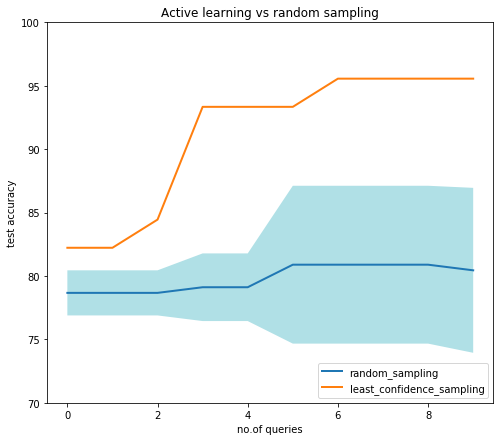

In [58]:
plt.rcParams["figure.figsize"] = [8,7]
plt.plot(list(range(10)),means,label='random_sampling',linewidth=2)
ax1=plt.gca()
ax1.set_ylim(70,100)
ax1.fill_between(list(range(10)),minus_d,plus_d,facecolor='powderblue')
plt.xlabel('no.of queries')
plt.ylabel('test accuracy')
plt.plot(list(range(10)),lc_accs,label='least_confidence_sampling',linewidth=2)
plt.title('Active learning vs random sampling')
plt.legend(loc='lower right')